## Week 2 : Linear Regression
```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
3.1 Overfitting & underfitting
```

<hr>

<img src="https://www.alpharithms.com/wp-content/uploads/1156/slope-intercept-vs-linear-regression-equations.jpg"/>



## Typical ML model Training Procedure

1. Define the Task (Supervised or unsupervised Learning, Classification or Regression)  
1. Import necessary libraries
1. Load and Explore the dataset (visualization) 
1. Preprocess the Data & split to train/test  (feature selection, scaling, normalization, etc..)
1. Build, Train and Test Model
1. Evaluate model using appropiate evaluation metrics (MSE, $R^2$, accuracy, f-score, precision, recall, etc.. )

## 1. Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
<br>
<br>
<center><b>Simple Linear Regression</b></center>

$$y = \beta_0 + \beta_1x_1$$

### 1.2 Import necessary libraries

In [117]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [118]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1.3 Load from database and Explore the dataset

In [119]:
from sqlalchemy import create_engine, text

session_engine = create_engine('sqlite:///ml-regression.db')

with session_engine.connect() as conn: 
    student_scores_df = pd.read_sql_query(text('SELECT * FROM student_scores'), conn) 

student_scores_df.drop(columns=['index'], inplace=True)
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1.3.1 Data profile and Statistics 

<span style="color:red">Task : Get data profile and save it as `.html`</span>

In [120]:
# import os
# from ydata_profiling import ProfileReport

# student_scores_df.describe()

# if not os.path.exists(os.path.join(os.getcwd(), "data_profile_student_scores.html")):
# 	report = ProfileReport(student_scores_df)
# 	report.to_file('data_profile_student_scores.html')

### 1.3.1 Visualization

Plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data points. Usually Matplotlib is used but some other libraries exist i.e [Plotly](https://github.com/plotly/plotly.py), [Seaborn](https://seaborn.pydata.org/),[Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide), [Gleam](https://github.com/dgrtwo/gleam), [ggplot](https://github.com/tidyverse/ggplot2)

**Remember :** Plot should have a title, axis labels, and legend for easy interpretation

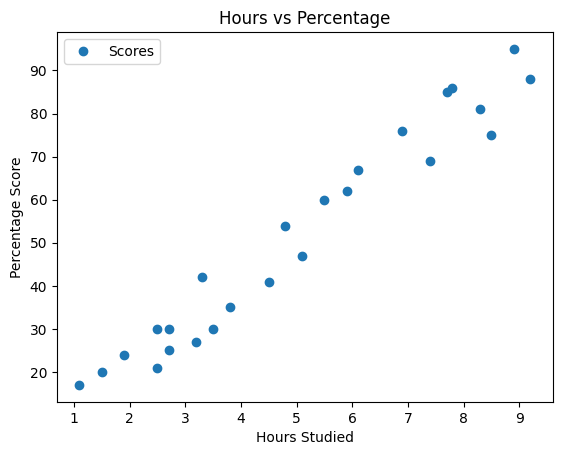

In [121]:
student_scores_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### 1.4 Preprocess the Data & split to train set and test set

<span style="color:red">Task : split the data into train (80%) and test (20%)</span>

In [122]:
X = student_scores_df.iloc[:, :-1].values
y = student_scores_df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

### 1.5 Build, Train and Test ModelLinear Regression Model

In [123]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df

Model intercept : 0.7711655942005251
Model coefficient : [10.17023703]


### 1.5 Evaluate model using appropiate evaluation metrics

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, y_pred))

Mean Absolute Error: 5.698991610328254
Mean Squared Error: 33.46837048749973
Root Mean Squared Error: 5.78518543242131


## 2. Multiple Linear Regression

Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n.$$

### 2.3  Load and Explore the dataset

In [126]:
with session_engine.connect() as conn:
    petrol_consumption_df = pd.read_sql_query(text('SELECT * FROM petrol_consumption'), conn)

petrol_consumption_df.drop('index', axis=1, inplace=True)
petrol_consumption_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [127]:
petrol_consumption_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


### 2.4 Preprocess the Data & split to train set and test set

In [128]:
X = petrol_consumption_df.drop('Petrol_Consumption', axis=1)
y = petrol_consumption_df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.5 Build, Train and Test Model Regression Model

In [129]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

Model intercept : 425.59933220324206
Model coefficients : [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


### 2.6 Evaluate model using appropiate evaluation metrics

<span style="color:red">Task 1 : Use the predict function in the model(`regressor`) to predict the output of the testset(`X_test`) and  print it. </span>

<span style="color:red">Task  2 : Measure the performance of the model using: <br>     </span>
1. root mean squared error 
1. mean absolute error 
1. coefficient of determination $R^2$. See [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for $R^2$.

In [130]:
y_predict = regressor.predict(X_test)
print(y_predict)

[469.39198872 545.64546431 589.66839402 569.7304133  649.77480909
 646.63116356 511.60814841 672.47517717 502.07478157 501.2707342 ]


In [131]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Coefficient pf Determination R2:', metrics.r2_score(y_test, y_predict))

Root Mean Squared Error: 68.31064915215173
Mean Absolute Error: 56.82224747896472
Coefficient pf Determination R2: 0.20361932410121653


## 3. Polynomial Regression, Underfitting & Overfitting

Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.

1. Why do we need it?
1. Which order of the polynomial should we choose? 
2. should we always pick the most complex model? 



### 3.2 Import libraries

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### 3.3 Load and Explore the dataset
<span style="color:red">Task : generate synthetic dataset by adding some random gaussian noise to a cosine function.</span>

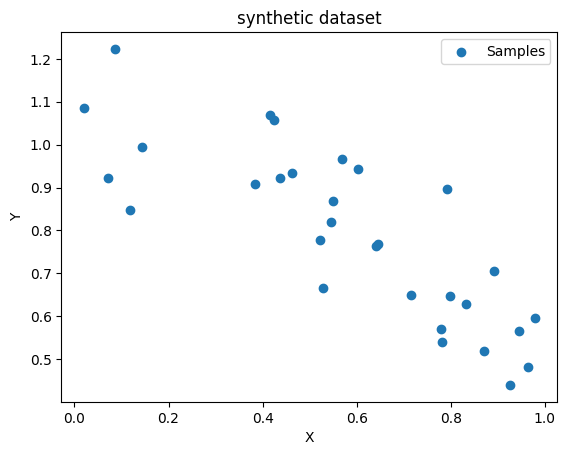

In [133]:
#  function
def fn(X):
    #Task : one line of code
    funky = np.cos(X)
    return funky

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = fn(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y,label="Samples")
plt.title('synthetic dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

### 3.4 Preprocess the Data, build model and evaluate model 

* We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.
* We will evaluate our model using cross validation

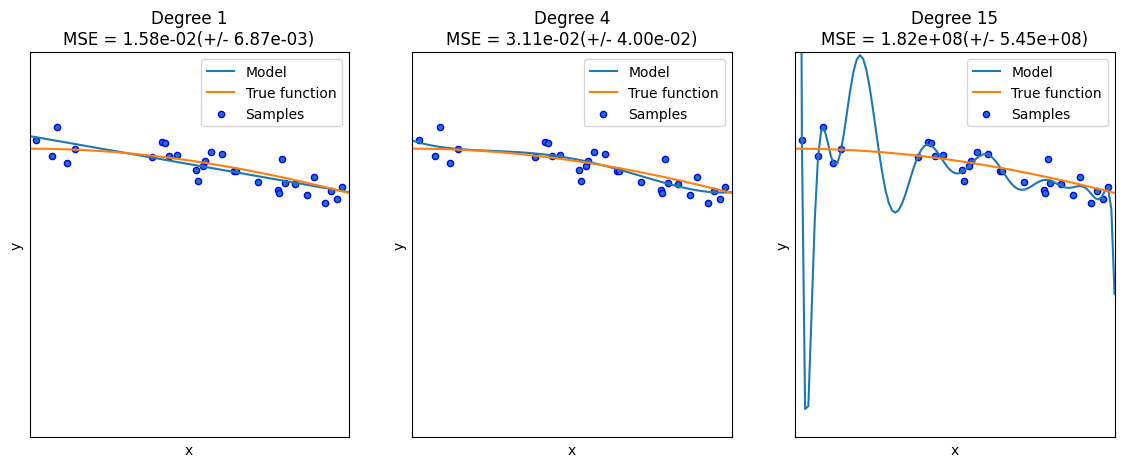

In [134]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, fn(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## <center>Self practice</center>

* Using steel industry energy consumption dataset from ([Link](https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption)) or `ml-regression.db`.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Train a multiple linear regression model that will predict the energy consumption `(Usage_kWh)`.
    1. Print the model `Mean Absolute Error`, `Mean Squared Error` and `Root Mean Squared Error`


* Select one independent and select `Usage_kWh` as dependent variable 
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs.

* Write a brief explanation of the insights that you got from the datasets  

In [135]:
from sqlalchemy import create_engine
engine = create_engine("sqlite+pysqlite:///ml-regression.db", echo=False)
connection = engine.connect()
data = pd.read_sql_table(table_name='steel_industry_data', con=connection)
# let's rename the target to easily identify it
data.rename(columns={'Usage_kWh': "y"}, inplace=True)
data.head()

,index,date,y,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [136]:
# Let us view the data report to realize what has to be done with the data
# before a linear regression model can be built
# import os
# if not os.path.exists(os.path.join(os.getcwd(), "data-linear-regression.html")):
# 	regression_report = ProfileReport(data)
# 	regression_report.to_file('data-linear-regression.html')

In [137]:
# let's split the data
X_train, X_test = train_test_split(data, train_size=0.8, random_state=0)

In [138]:
X_train.nunique()

index                                   28032
date                                    28032
y                                        3207
Lagging_Current_Reactive.Power_kVarh     1913
Leading_Current_Reactive_Power_kVarh      767
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             4897
Leading_Current_Power_Factor             3038
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [139]:
# drop 'index' and 'date' for 
X_train.drop(columns=['index', 'date', 'WeekStatus'], inplace=True)
X_test.drop(columns=['index', 'date', 'WeekStatus'], inplace=True)

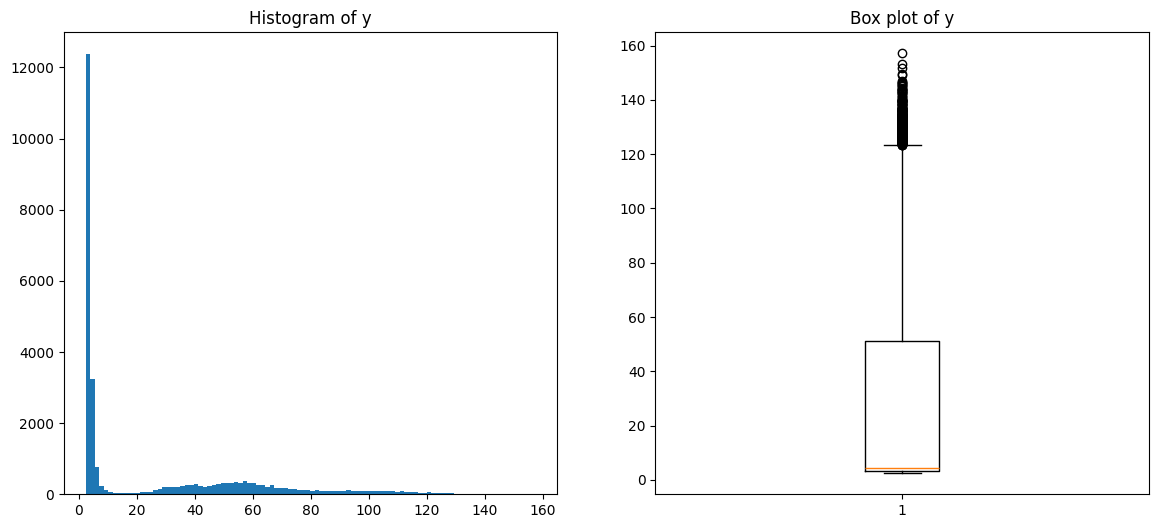

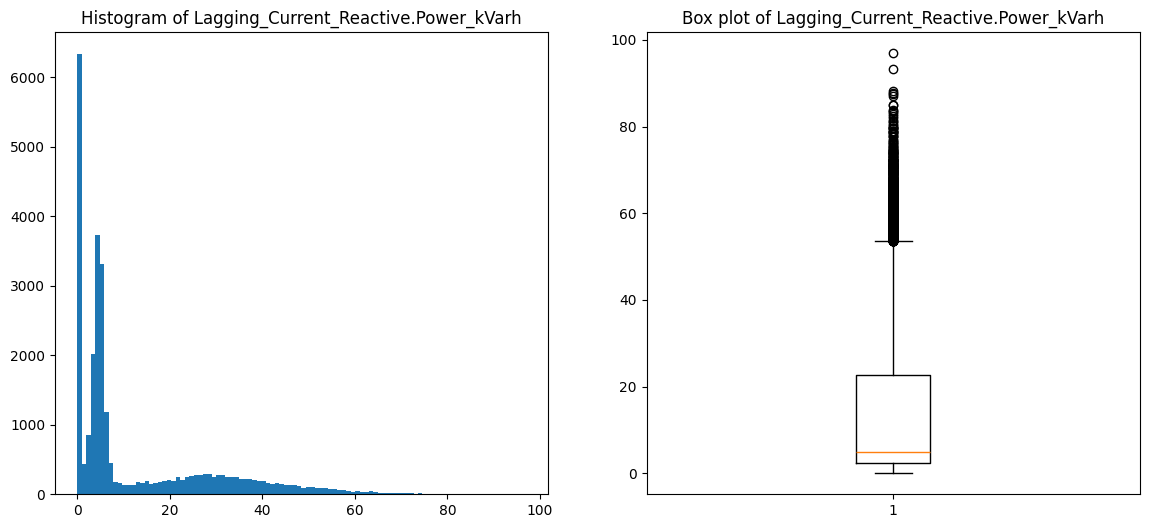

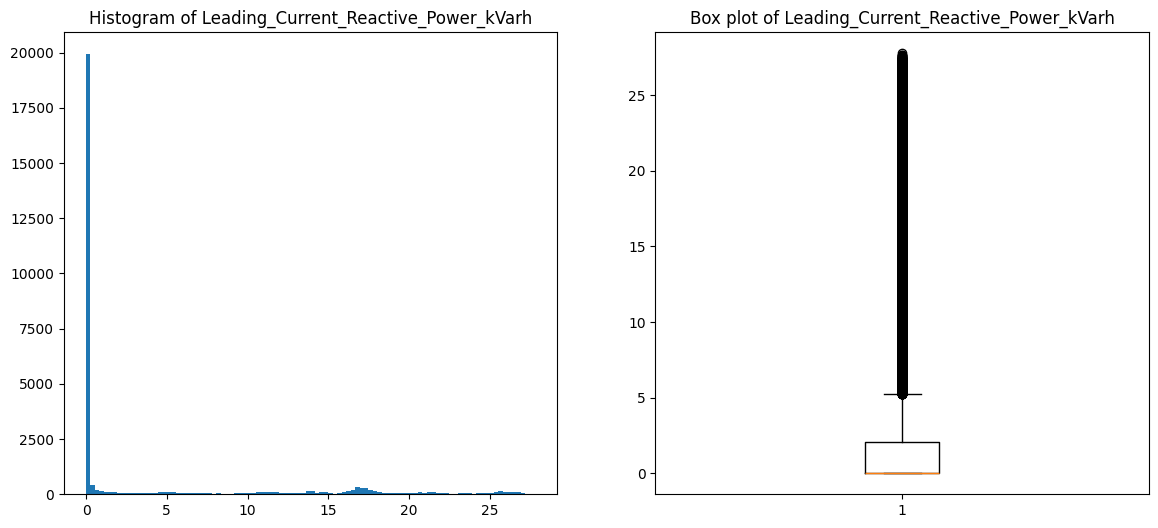

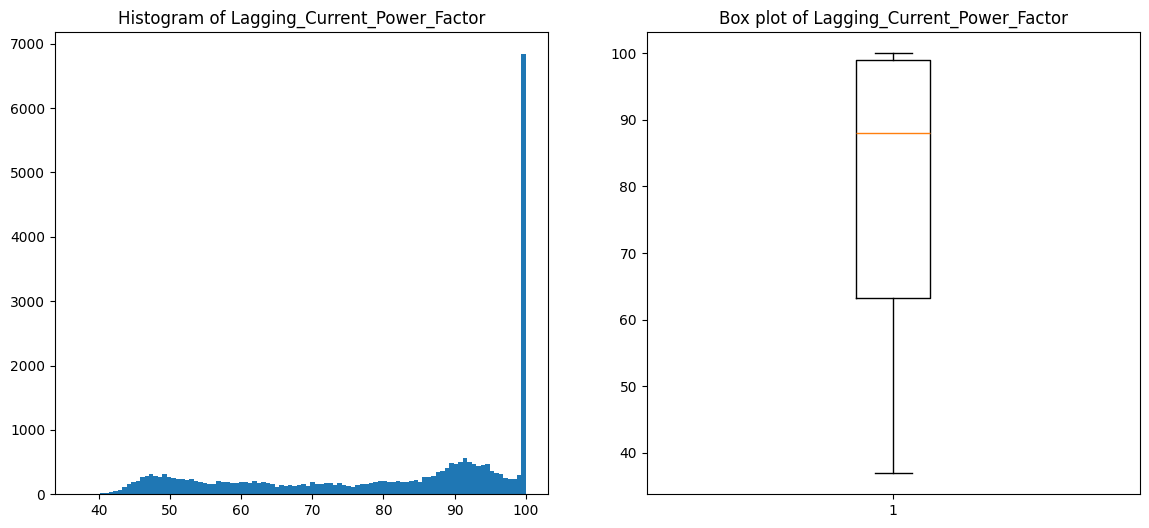

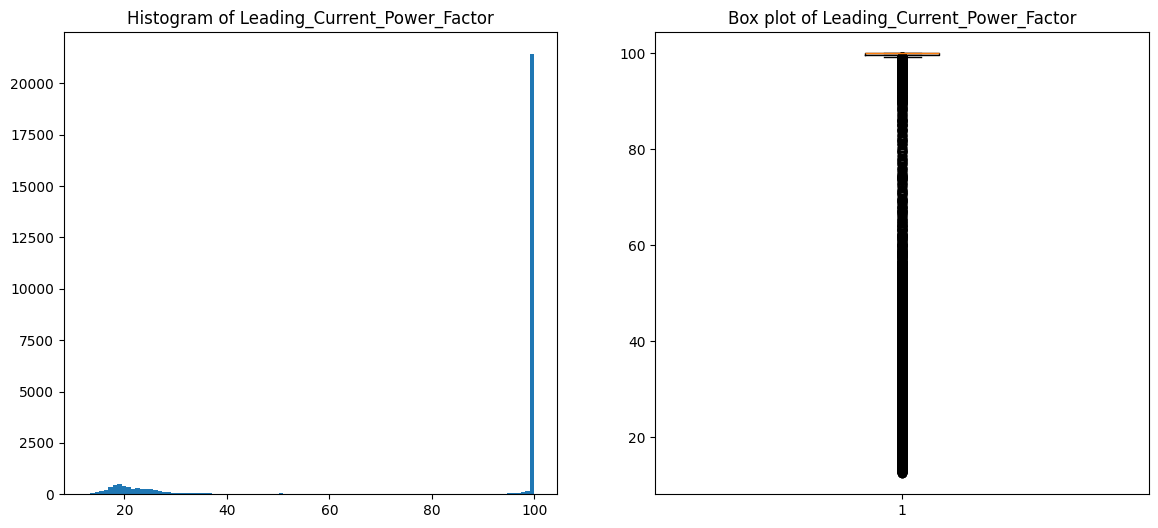

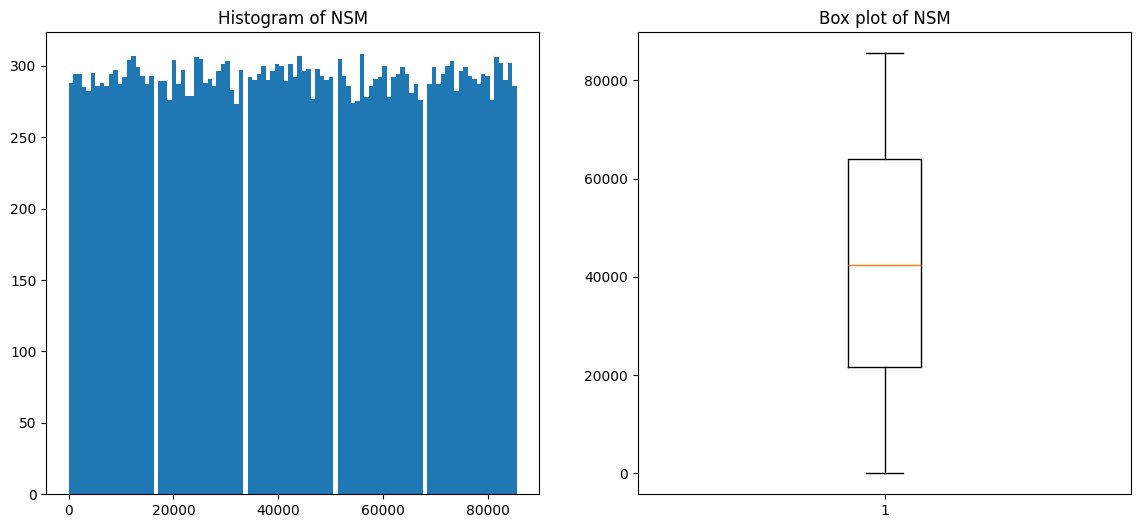

In [140]:
from datakit.visualize import visualize as vis

continuous_cols = [c for c in X_train.columns if X_train[c].nunique() > 10]
continuous_cols

# fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

for c in continuous_cols:    
	vis.visualize_continuous_distribution(X_train[c], sequence_name=c)


In [141]:
from typing import List
def plot_multiple_histograms(x1: pd.Series | np.ndarray, 
							 x2: pd.Series | np.ndarray,
							 labels: List[str],
							 title: str):
	plt.figure(figsize=(14, 6))
	_, _, _ = plt.hist(x1, bins=10, label=labels[0])
	_ = plt.hist(x2, bins=10, alpha=0.3, label=labels[1])
	plt.legend()
	plt.title(title)
	plt.show()

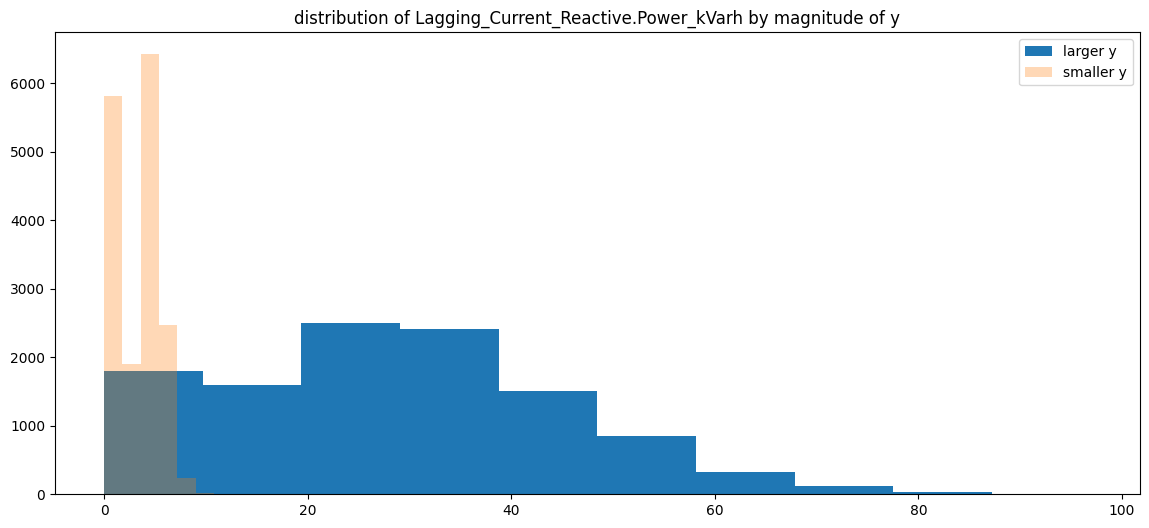

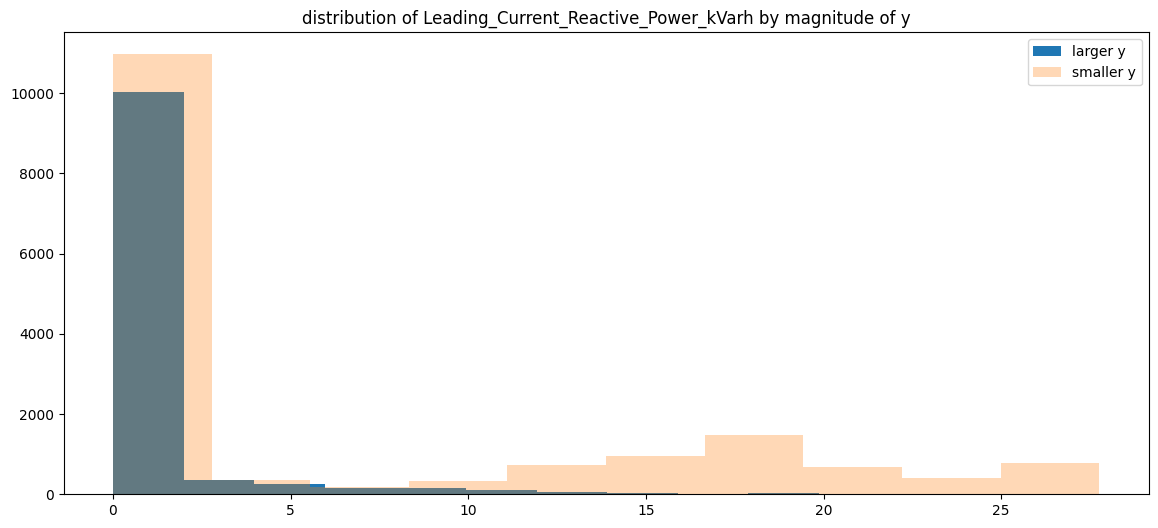

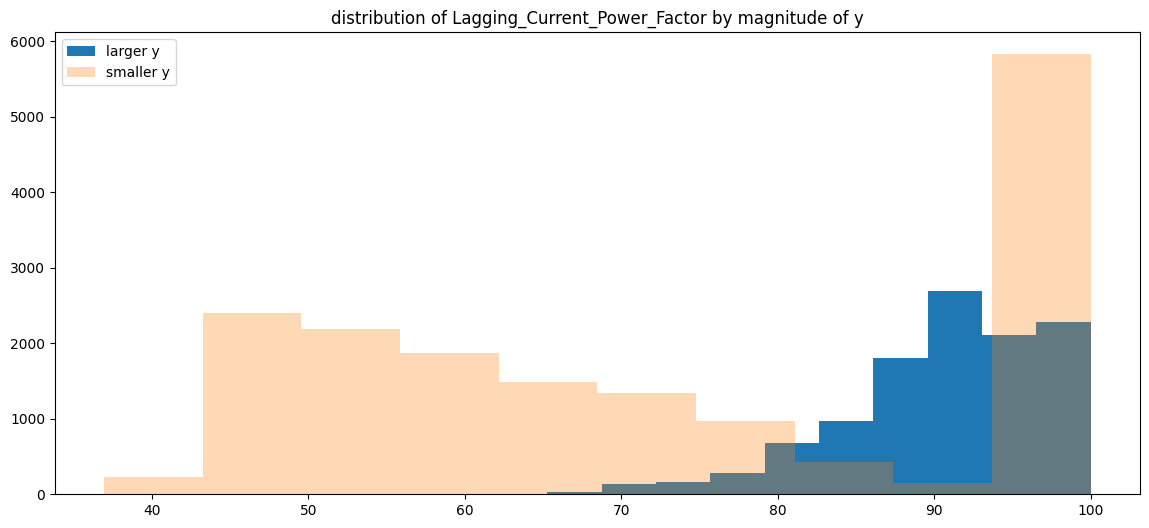

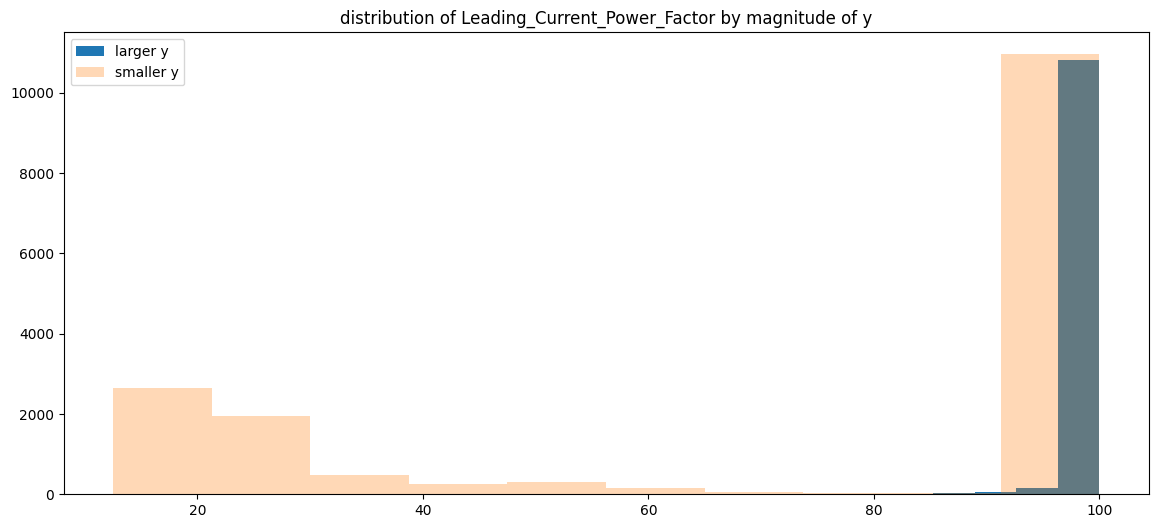

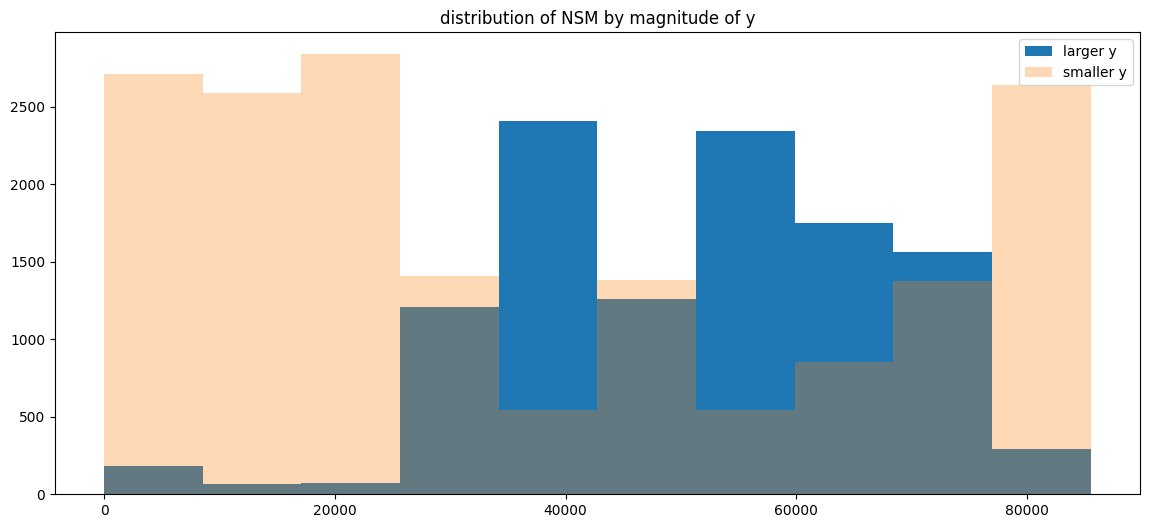

In [142]:
# 2 main observations here !! for each continuous varible, we can see 2 different parts / plots. Let's see if we can find some relation between both 
# let's see if the parts somehow overlap
X_train['y_large'] = (X_train['y'] >= 15).astype(int)
X_train1, X_train2 = X_train[X_train['y_large'] == True], X_train[X_train['y_large'] == False]

for cc in continuous_cols:
    if cc == 'y':
        continue
    x1, x2 = X_train1[cc], X_train2[cc]
    plot_multiple_histograms(x1, x2, labels=['larger y', 'smaller y'], title=f"distribution of {cc} by magnitude of y")

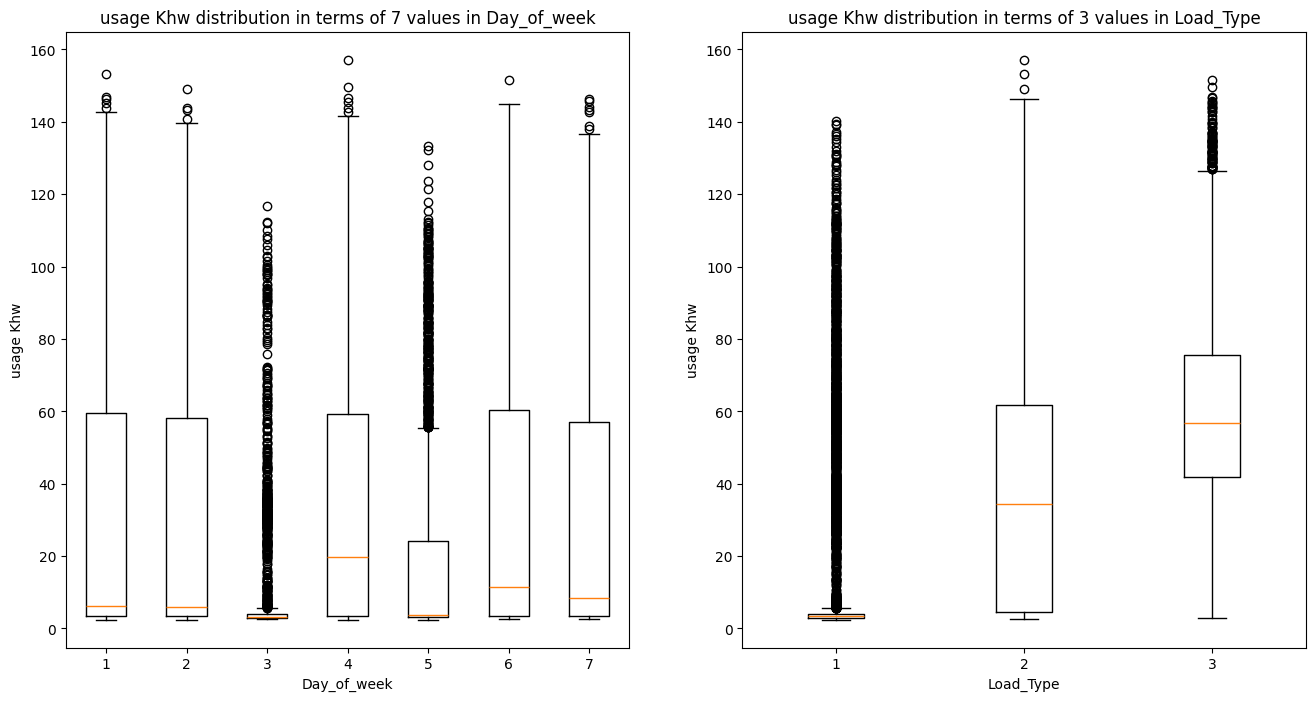

In [143]:
discrete_cols = ['Day_of_week', 'Load_Type']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for i, dc in enumerate(discrete_cols):
	vis.visualize_discrete_values(X_train, 
							   feat_col=dc, 
							   label_col='y', 
							   label_name='usage Khw', 
							   n_most_freq=None, values_as_xticks=True,
							   axes=ax[i], 
							   show=False)

plt.show()

In [144]:
try:
	X_train.drop(columns=['y_large'], inplace=True)
	y_train = X_train.pop('y')
	y_test = X_test.pop('y')
except KeyError:
	# just added the key error exception to rerun the cell in peace...
	pass

Day of the week and load type can be best encoded with a one-hot encoder.

In [145]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=["Day_of_week", "Load_Type"], handle_unknown='ignore')
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

The datatset has no missing values, so we can skip the data inputing part and go straight to the linear regression after splitting the dataset.

In [149]:
# Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train.values, y_train.values)
y_pred = lr.predict(X_test.values)

Now, let us evaluate the results of said linear regression.

In [151]:
def evaluate(y_pred: np.ndarray, y_test: np.ndarray):
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred).item()
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred).item()
    root_mean_squared_error = metrics.root_mean_squared_error(y_test, y_pred).item()
    print(f"Mean absolute error: {mean_absolute_error}\nMean squared error: {mean_squared_error}\nRoot mean squared error: {root_mean_squared_error}")
    return mean_absolute_error, mean_squared_error, root_mean_squared_error

evaluate(y_pred, y_test)

Mean absolute error: 2.577331427599282
Mean squared error: 25.496621324248167
Root mean squared error: 5.049417919349533


(2.577331427599282, 25.496621324248167, 5.049417919349533)

In [152]:
X_train.columns

Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6', 'Day_of_week_7', 'Load_Type_1',
       'Load_Type_2', 'Load_Type_3'],
      dtype='object')

### Polynomial regression

The brief analysis showed that a small value of `Lagging_Current_Reactive.Power_kVarh` is highly correlated with small values of `y`. The overall relationship between both variables is clearly not linear as it can most probably
be modeled with different models at different ranges. I will choose only the values for which ``Lagging_Current_Reactive.Power_kVarh`` is small and run the model

In [160]:
var = "Lagging_Current_Reactive.Power_kVarh"
data_small_var = data[data[var] <= 15]
print(data_small_var.shape) # still have most of the data
y_small_var = data_small_var.pop('y')
data_train, data_test, y_train, y_test = train_test_split(data_small_var, y_small_var, test_size=0.2)

(24348, 12)


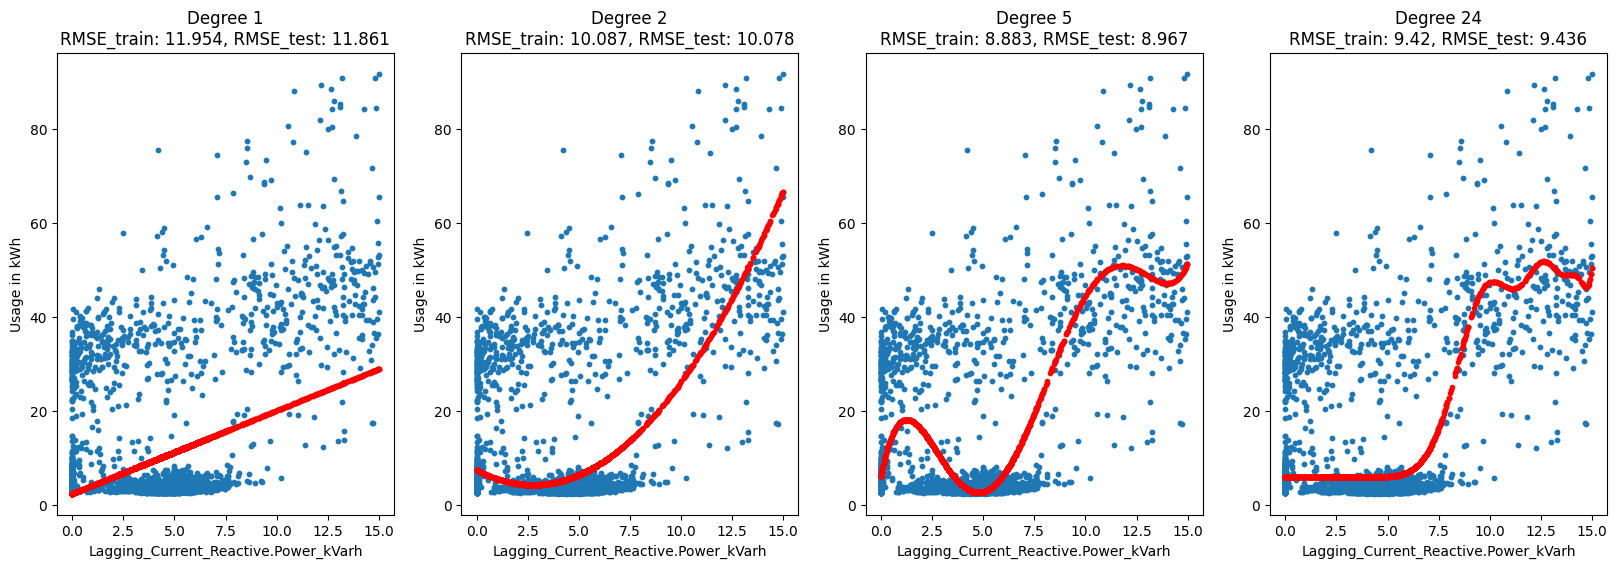

In [165]:


degrees = [1, 2, 5, 24]

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i in range(len(degrees)):
    poly = PolynomialFeatures(degrees[i])
    poly_features = poly.fit_transform(data_train.loc[:, [var]].values, y_train)
    poly_regression = LinearRegression()
    poly_regression.fit(poly_features, y_train)
    poly_test_features = poly.fit_transform(data_test.loc[:, [var]].values, y_test)
    pred = poly_regression.predict(poly_test_features)
    
    mse_train = metrics.root_mean_squared_error(poly_regression.predict(poly_features), y_train)
    mse_test = metrics.root_mean_squared_error(pred, y_test)
    
    axes[i].set_title(f"Degree {degrees[i]}\nRMSE_train: {round(mse_train, 3)}, RMSE_test: {round(mse_test, 3)}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Usage in kWh")
    axes[i].scatter(data_test[var], y_test, s=10)
    axes[i].plot(data_test[var], pred, 'r.')

plt.show()

We can see that there is some sort of relation between the 2 variables. However, it is definitely not enough to predict the power consumption with only this variable.  Since the relation is clearly not linear, the training and testing loss are both high and close in values. 

3. Insights from the datasets:

The dataset was of a good quality, as it had no missing values and we did not have to impute any of the data. Still, some preprocessing was required, as it contained multiple categorical variables and a feature that merely represented the time passed since the beginning of the data tracking, unsuitable for a linear regression model.

As to the structure of the dataset, it contained a lot of features related to time-series data, such as the exact date, day of the week, and whether it's a weekday or a weekend. It also contained many physical statistics in range (0, 100), and I suspect there might be some cross-correlation between them. A lot of features are also valued either 0, or 1, so the task of optimizing feature weights is complicated even more.

The small RMSe on the entire dataset suggests that the task is relatively simple and the overall performance can probably be significantly improved with splitting the data into smaller datasets with specific range of values. EAch of these datasets can probably be solved with Linear or Polynomial Regression